<a href="https://colab.research.google.com/github/polko14/Gauss/blob/master/Copy_of_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary modules

In [0]:
import numpy as np
import pandas as pd
import sklearn
import keras
import seaborn
import matplotlib.pyplot as plt
import tensorflow
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/Dalthirr/NeuralNetworks/master/Churn_Modelling.csv'
df=pd.read_csv(url) #Pobieranie danych
df = df.drop(["CustomerId", "Surname", "RowNumber"],
        axis=1)
df = pd.concat([df, pd.get_dummies(df[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df[["Gender", "Geography"]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Gender_Male          10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [0]:
X=(df.drop(['Exited'], axis=1))
y=(df.Exited)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

scaler=StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)





In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Creating Model, I will build simple networt using Sequential.
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(34, activation='relu'))



# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=3, batch_size=1, verbose=1,validation_data=(X_test,y_test))

model.evaluate(X_test,y_test)

#model.predict(X_test)

Train on 6700 samples, validate on 3300 samples
Epoch 1/3
6700/6700 [==============================] - 22s 3ms/step - loss: 0.4372 - acc: 0.8115 - val_loss: 0.3800 - val_acc: 0.8394
Epoch 2/3
6700/6700 [==============================] - 22s 3ms/step - loss: 0.3636 - acc: 0.8496 - val_loss: 0.3527 - val_acc: 0.8524
Epoch 3/3
3300/3300 [==============================] - 0s 31us/step


[0.3504163798780152, 0.8536363636363636]

In [0]:
lista = []
for i in range(len(df.values)):
  if (df['Exited'].values)[i]==0 and random.random()>0.25:
    lista.append(i)
print(len(lista))
newdf = df.drop(lista)
X=(df.drop(['Exited'], axis=1)) #wyrzucamy exited
X = (X-X.mean())/X.std()
y=(df.Exited)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(y),(y.sum()),len(X))
scaler=StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


5993
10000 2037 10000


In [0]:
#half-half
nX=(newdf.drop(['Exited'], axis=1)) #wyrzucamy exited
nX = (nX-nX.mean())/nX.std()
ny=(newdf.Exited)
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.3, random_state=42 )

nscaler=StandardScaler().fit(nX_train)
nX_train = scaler.transform(nX_train)
nX_test = scaler.transform(nX_test)


In [0]:
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(20, activation='tanh'))


# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(nX_train, ny_train,epochs=20, batch_size=10, verbose=1)


Epoch 1/20
2804/2804 [==============================] - 1s 395us/step - loss: 0.6454 - acc: 0.6255
Epoch 2/20
2804/2804 [==============================] - 1s 312us/step - loss: 0.5770 - acc: 0.7011
Epoch 3/20
2804/2804 [==============================] - 1s 294us/step - loss: 0.5574 - acc: 0.7133
Epoch 4/20
2804/2804 [==============================] - 1s 290us/step - loss: 0.5431 - acc: 0.7243
Epoch 5/20
2804/2804 [==============================] - 1s 288us/step - loss: 0.5326 - acc: 0.7318
Epoch 6/20
2804/2804 [==============================] - 1s 297us/step - loss: 0.5220 - acc: 0.7382
Epoch 7/20
2804/2804 [==============================] - 1s 285us/step - loss: 0.5126 - acc: 0.7425
Epoch 8/20
2804/2804 [==============================] - 1s 291us/step - loss: 0.5031 - acc: 0.7532
Epoch 9/20
2804/2804 [==============================] - 1s 289us/step - loss: 0.4932 - acc: 0.7596
Epoch 10/20
2804/2804 [==============================] - 1s 286us/step - loss: 0.4853 - acc: 0.7675
Epoch 11/

In [0]:
ynew = model.predict_classes(X_test)
# show the inputs and predicted outputs
counter = 0
for i in range(len(ynew)):
  if y_test.values[i] == ynew[i]:
    counter += 1
print(counter/len(ynew))

0.6733333333333333


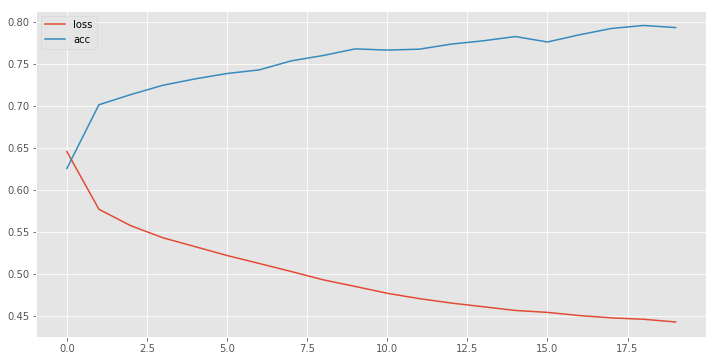

In [0]:

plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['acc'], label = "acc")
plt.legend()
plt.show()